In [ ]:
!pip install karateclub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install rdkit-pypi -qqq

In [ ]:
import rdkit
from rdkit import Chem
import networkx as nx
from karateclub import Graph2Veca

# import numpy/pandas ---------------------------------------------------------
import numpy as np
import pandas as pd

print(">>> read the data file ... ")
hiv = pd.read_csv('HIV.csv')
print(">>> data shape = ", hiv.shape)
print(">>> data columns = ", hiv.columns, "\n")
print(hiv)
print()

print(">>> create mol from smiles ... ")
hiv['mol'] = hiv['smiles'].apply(lambda x: Chem.MolFromSmiles(x))

# define the function for coverting rdkit object to networkx object -----------
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())

    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())

    return G

print(">>> create nx from mol ... ")
hiv['graph'] = hiv['mol'].apply(lambda x: mol_to_nx(x))

print(">>> create graph embedding ... ")
model = Graph2Vec()
model.fit(hiv['graph'])
hiv_graph2vec = model.get_embedding()

hiv_graph2vec = pd.DataFrame(hiv_graph2vec)
print(">>> hiv_graph2vec shape = ", hiv_graph2vec.shape)
print(hiv_graph2vec)
print()

>>> read the data file ... 
>>> data shape =  (41127, 3)
>>> data columns =  Index(['smiles', 'activity', 'HIV_active'], dtype='object') 

                                                  smiles activity  HIV_active
0      CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...       CI           0
1      C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...       CI           0
2                       CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21       CI           0
3        Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1       CI           0
4                                 O=S(=O)(O)CCS(=O)(=O)O       CI           0
...                                                  ...      ...         ...
41122  CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...       CI           0
41123  Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...       CI           0
41124  Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...       CI           0
41125  Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...       CI           0
411

[14:44:29] WARNING: not removing hydrogen atom without neighbors
[14:44:29] WARNING: not removing hydrogen atom without neighbors


>>> create nx from mol ... 
>>> create graph embedding ... 
>>> hiv_graph2vec shape =  (41127, 128)
            0         1         2         3         4         5         6    \
0      0.020787  0.079775 -0.153430  0.087645 -0.045231 -0.053307 -0.054316   
1      0.011474  0.126756 -0.157945  0.079990 -0.004505 -0.077805 -0.037625   
2     -0.003224  0.052559 -0.053742  0.097646  0.005042 -0.011374 -0.047605   
3     -0.010386  0.085501 -0.171814 -0.008083 -0.059152 -0.003444 -0.037389   
4     -0.036617  0.081219 -0.056188  0.137408 -0.067479 -0.012133  0.019468   
...         ...       ...       ...       ...       ...       ...       ...   
41122 -0.011910  0.058288 -0.060975  0.113339  0.002357  0.058261 -0.087598   
41123  0.029679  0.110693 -0.074236  0.053545 -0.015752  0.043733 -0.130515   
41124  0.008126  0.110221 -0.072034  0.039760 -0.021841  0.041543 -0.100449   
41125  0.018074  0.097145 -0.081849  0.035432 -0.004057  0.047360 -0.094301   
41126 -0.023327  0.022849 -0.06

In [ ]:
from rdkit.Chem import Draw

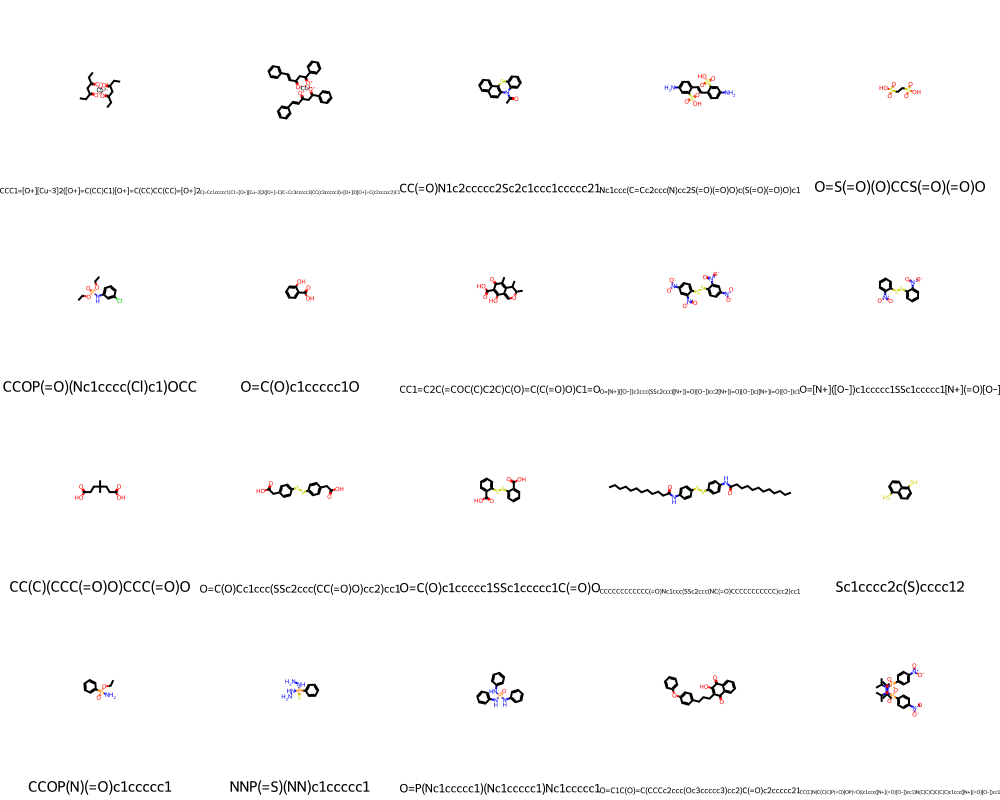

In [ ]:
mols = hiv['mol'][:20]
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(hiv['smiles'][:20].values))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

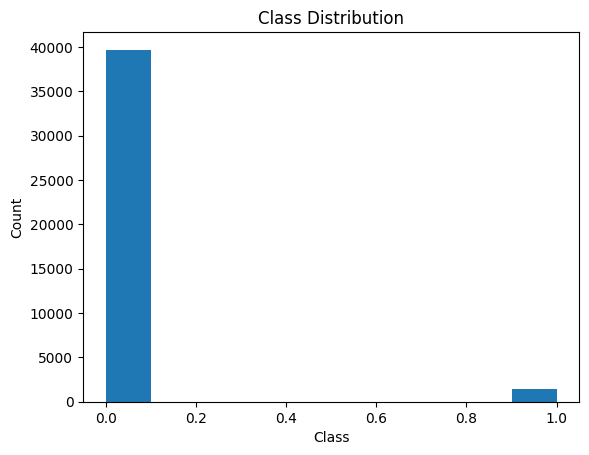

In [ ]:
# Load the HIV dataset
df = pd.read_csv('HIV.csv')

# Split the dataset into features (X) and target (y)
X = hiv_graph2vec
y = df['HIV_active']

# Visualize the class distribution
plt.hist(y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
df.info()
# no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41127 entries, 0 to 41126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   smiles      41127 non-null  object
 1   activity    41127 non-null  object
 2   HIV_active  41127 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 964.0+ KB


In [ ]:
counts = df.groupby('HIV_active').size()
counts
# class imbalance

HIV_active
0    39684
1     1443
dtype: int64

Tambahan buat sebelum di resample

In [ ]:
# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
print('Random Forest:')
print(classification_report(y_test, y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('F1 Score :', f1_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print('')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7929
           1       0.80      0.11      0.19       297

    accuracy                           0.97      8226
   macro avg       0.88      0.55      0.59      8226
weighted avg       0.96      0.97      0.95      8226

Accuracy: 0.9668125455871627
F1 Score : 0.18991097922848665
Precision: 0.8
Recall: 0.10774410774410774

Confusion Matrix:
 [[7921    8]
 [ 265   32]]


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [ ]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_logreg))
print('Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('F1 Score :', f1_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print('')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_logreg))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7929
           1       0.80      0.03      0.05       297

    accuracy                           0.96      8226
   macro avg       0.88      0.51      0.52      8226
weighted avg       0.96      0.96      0.95      8226

Accuracy: 0.9646243617797229
F1 Score : 0.05211726384364821
Precision: 0.8
Recall: 0.026936026936026935

Confusion Matrix:
 [[7927    2]
 [ 289    8]]


SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))
print('Accuracy:', accuracy_score(y_test, y_pred_svc))
print('F1 Score :', f1_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print('')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svc))

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7929
           1       0.91      0.07      0.13       297

    accuracy                           0.97      8226
   macro avg       0.94      0.54      0.56      8226
weighted avg       0.96      0.97      0.95      8226

Accuracy: 0.9662047167517627
F1 Score : 0.13124999999999998
Precision: 0.9130434782608695
Recall: 0.0707070707070707

Confusion Matrix:
 [[7927    2]
 [ 276   21]]


## Resampling

In [ ]:
# RandomOverSampler for class imbalance
over = RandomOverSampler(sampling_strategy=1)
X_resampled, y_resampled = over.fit_resample(X, y)

In [ ]:
print(X_resampled.shape, y_resampled.shape)

(79368, 128) (79368,)


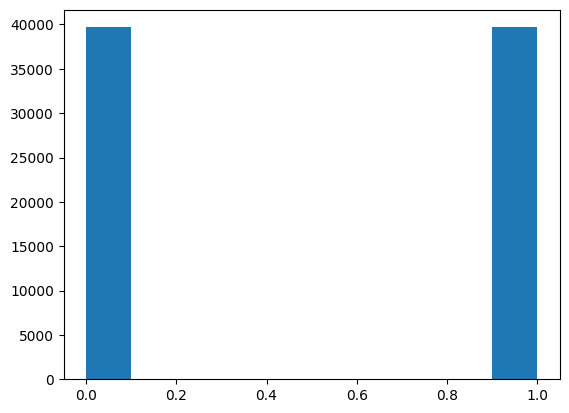

In [ ]:
# visualize class distribution after applying RandomOverSampler
plt.hist(y_resampled)
plt.show()

In [ ]:
# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(63494, 128) (15874, 128) (63494,) (15874,)


##RANDOM FOREST

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

##PERFORMANCE MEASURE

In [ ]:
print('Random Forest:')
print(classification_report(y_test, y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('F1 Score :', f1_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print('')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7931
           1       1.00      1.00      1.00      7943

    accuracy                           1.00     15874
   macro avg       1.00      1.00      1.00     15874
weighted avg       1.00      1.00      1.00     15874

Accuracy: 0.9981731132669774
F1 Score : 0.9981778196669809
Precision: 0.9963622679377823
Recall: 1.0

Confusion Matrix:
 [[7902   29]
 [   0 7943]]


# LOGISTIC REGRESSION

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_logreg))
print('Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('F1 Score :', f1_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print('')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_logreg))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.62      0.75      0.68      7931
           1       0.68      0.55      0.61      7943

    accuracy                           0.65     15874
   macro avg       0.65      0.65      0.64     15874
weighted avg       0.65      0.65      0.64     15874

Accuracy: 0.6460249464533199
F1 Score : 0.6069254984260232
Precision: 0.6829345088161209
Recall: 0.5461412564522221

Confusion Matrix:
 [[5917 2014]
 [3605 4338]]


# SVM

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))
print('Accuracy:', accuracy_score(y_test, y_pred_svc))
print('F1 Score :', f1_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print('')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svc))

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78      7931
           1       0.85      0.61      0.71      7943

    accuracy                           0.75     15874
   macro avg       0.77      0.75      0.74     15874
weighted avg       0.77      0.75      0.74     15874

Accuracy: 0.7494645331989417
F1 Score : 0.708794025042103
Precision: 0.8470423521176059
Recall: 0.609341558605061

Confusion Matrix:
 [[7057  874]
 [3103 4840]]
